In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [2]:
data = pd.read_csv("Crop_recommendation.csv")
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [3]:
print("The Shape of the Dataset is: {}" .format(data.shape))

The Shape of the Dataset is: (2200, 8)


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [5]:
data.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [6]:
data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

## Data Viz

Spread of Ph and Temperature in the data.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ph', ylabel='Density'>

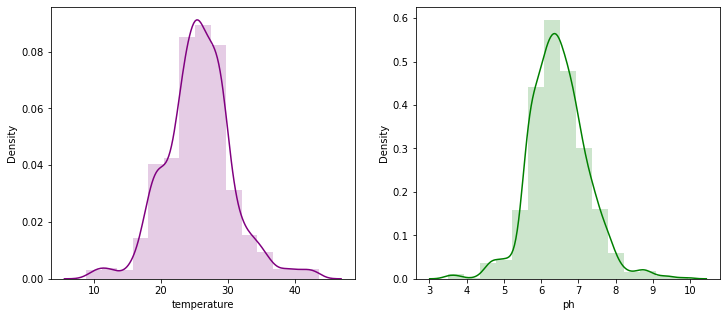

In [7]:
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
sns.distplot(data['temperature'],color="purple",bins=15,hist_kws={'alpha':0.2})
plt.subplot(1, 2, 2)
sns.distplot(data['ph'],color="green",bins=15,hist_kws={'alpha':0.2})

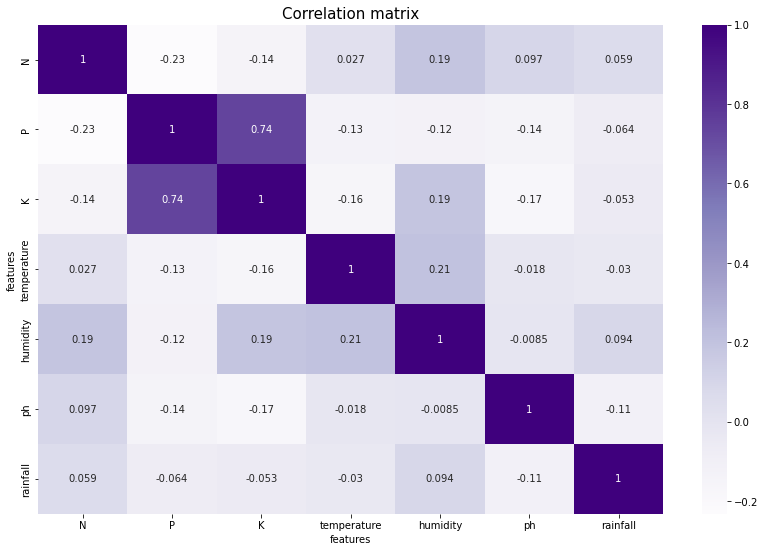

In [8]:
#Correlation matrix
fig, ax = plt.subplots(1, 1, figsize=(14, 9))
sns.heatmap(data.corr(), annot=True,cmap='Purples')
ax.set(xlabel='features')
ax.set(ylabel='features')

plt.title('Correlation matrix', fontsize = 15, c='black')
plt.show()

Potassium (K) and Phosporus (P) have very high correlation.

In [9]:
columns = data.columns[:-1]

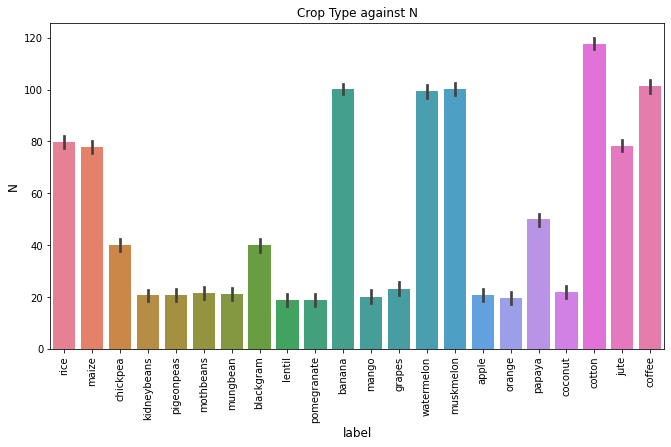

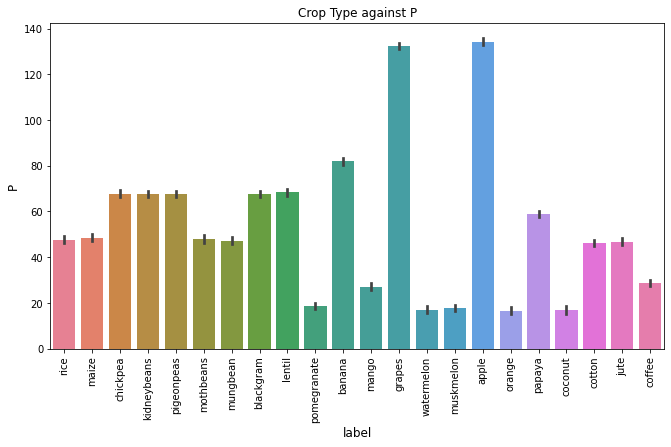

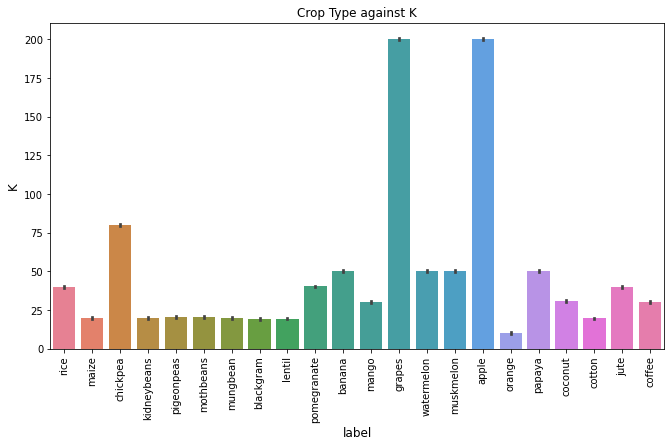

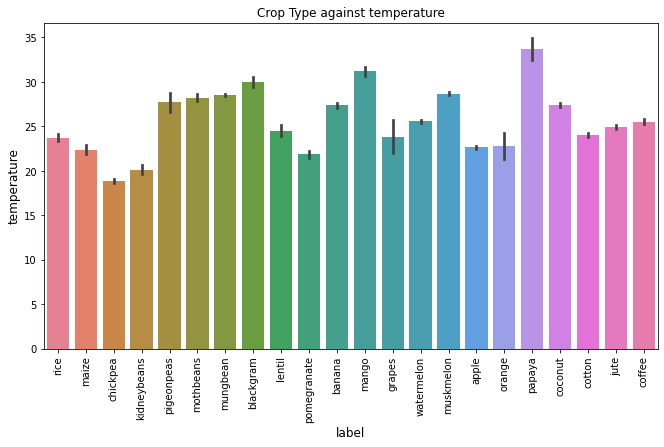

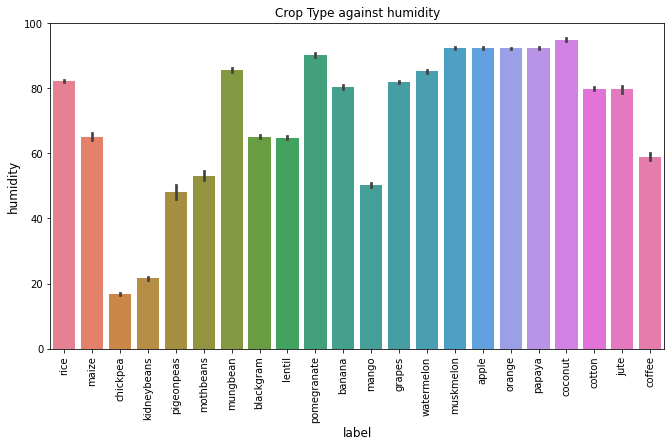

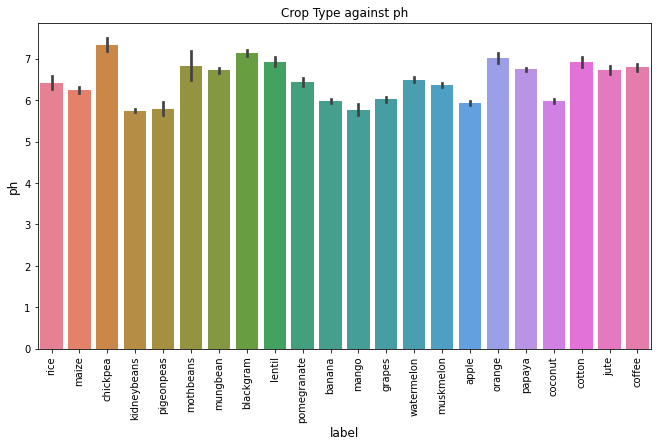

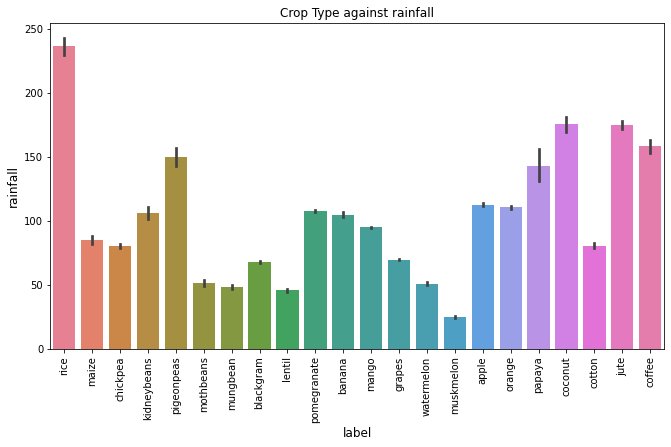

In [10]:
for column in columns:
    plt.figure(figsize = (11, 6))
    sns.barplot(x = 'label', y = column, data = data, palette = 'husl')
    plt.xlabel('label', fontsize = 12)
    plt.ylabel(column, fontsize = 12)
    plt.xticks(rotation=90)
    plt.title(f'Crop Type against {column}')
    plt.show()

### Split Data.

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
train, test = train_test_split(data, test_size = 0.3, random_state= 2022)

In [13]:
train = train.reset_index(drop=True)
test = test.reset_index(drop=True)

In [14]:
truth = train.label

In [15]:
X = train.iloc[:,:-1]
y = train.label

In [16]:
from catboost import CatBoostClassifier

In [17]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
model = CatBoostClassifier(n_estimators=500,max_depth=8
                          ,random_state = 2022, verbose=100)
model.fit(X_train,y_train)

Learning rate set to 0.143653
0:	learn: 2.3693695	total: 320ms	remaining: 2m 39s
100:	learn: 0.0261796	total: 18.1s	remaining: 1m 11s
200:	learn: 0.0114890	total: 33s	remaining: 49.1s
300:	learn: 0.0072496	total: 47.9s	remaining: 31.6s
400:	learn: 0.0052515	total: 1m 3s	remaining: 15.7s
499:	learn: 0.0041308	total: 1m 25s	remaining: 0us


In [20]:
pred_val = model.predict(X_test)
accuracy_score(pred_val, y_test)

0.9967532467532467

### Train for Production

In [21]:
import time
start_time = time.time()

model = CatBoostClassifier(n_estimators=500,max_depth=8
                          ,random_state = 2022, verbose=False)
model.fit(X, y)

print("--- %s seconds ---" % (time.time() - start_time))

--- 83.82403349876404 seconds ---


In [22]:
answers = model.predict(test.iloc[:,:-1])
answers

array([['chickpea'],
       ['lentil'],
       ['mungbean'],
       ['chickpea'],
       ['mungbean'],
       ['coffee'],
       ['pigeonpeas'],
       ['orange'],
       ['chickpea'],
       ['coffee'],
       ['jute'],
       ['banana'],
       ['orange'],
       ['muskmelon'],
       ['pomegranate'],
       ['papaya'],
       ['mothbeans'],
       ['watermelon'],
       ['mothbeans'],
       ['orange'],
       ['maize'],
       ['muskmelon'],
       ['rice'],
       ['rice'],
       ['mungbean'],
       ['lentil'],
       ['coffee'],
       ['jute'],
       ['rice'],
       ['lentil'],
       ['rice'],
       ['kidneybeans'],
       ['coconut'],
       ['papaya'],
       ['banana'],
       ['mango'],
       ['blackgram'],
       ['orange'],
       ['cotton'],
       ['maize'],
       ['watermelon'],
       ['mothbeans'],
       ['mungbean'],
       ['mango'],
       ['mothbeans'],
       ['blackgram'],
       ['jute'],
       ['orange'],
       ['mango'],
       ['pigeonpeas'],
    

In [23]:
truth = test.label
truth[:10]

0      chickpea
1        lentil
2      mungbean
3      chickpea
4      mungbean
5        coffee
6    pigeonpeas
7        orange
8      chickpea
9        coffee
Name: label, dtype: object

In [24]:
print("Accuracy",accuracy_score(answers, truth))
print("Recall",recall_score(answers, truth,  average="micro"))
print("Precision",precision_score(answers, truth,average="micro"))
print("F1 Score",f1_score(answers, truth,average="micro"))

Accuracy 0.9924242424242424
Recall 0.9924242424242424
Precision 0.9924242424242424
F1 Score 0.9924242424242424


In [3]:
model=pickle.load(open("catboost_model.pkl","rb"))